In [1]:
# Importing necessary libraries:

import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV
import pickle

In [2]:
# import dataset

path = r'Data\data.csv'
dataset = pd.read_csv(path)
df = dataset.copy()

In [3]:
df.head()

,id,age,antiquity,salary,state,area_CUSTOMER SUCCESS,area_TALENT POOL,area_GROWTH,area_PEOPLE DEVELOPMENT,area_RETAIL_FINANCIAL_BD,...,chapter_AGILISMO,chapter_RESEARCH,chapter_TI,seniority_ADVANCED,seniority_JUNIOR,seniority_SENIOR,seniority_MASTER,seniority_TRAINEE,sex_MASCULINO,sex_FEMENINO
0,005428920349380a73fff626ecfac47c,-0.444944,-0.360950,-0.312274,active,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,005c436c2cd0d824eac8fc7047198308,1.962052,1.314380,7.128367,active,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,006701a9d6145ecc61ddc3092eb9a004,-0.896256,-0.675075,-0.812593,retired,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,00b318b70e0d319f307952f5f7eca2bf,-0.745819,0.057882,0.072587,active,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,00cea163e55ecbadfbf41a8217d46140,0.156805,2.570878,-0.464679,active,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
df = df.drop('id', axis=1)

In [5]:
df

,age,antiquity,salary,state,area_CUSTOMER SUCCESS,area_TALENT POOL,area_GROWTH,area_PEOPLE DEVELOPMENT,area_RETAIL_FINANCIAL_BD,area_PRAGMA_REGIONES,...,chapter_AGILISMO,chapter_RESEARCH,chapter_TI,seniority_ADVANCED,seniority_JUNIOR,seniority_SENIOR,seniority_MASTER,seniority_TRAINEE,sex_MASCULINO,sex_FEMENINO
0,-0.444944,-0.360950,-0.312274,active,1.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.962052,1.314380,7.128367,active,1.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-0.896256,-0.675075,-0.812593,retired,1.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,-0.745819,0.057882,0.072587,active,1.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.156805,2.570878,-0.464679,active,1.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,1.753983,-0.363901,-0.052932,retired,0.872303,0.0,0.0,0.0,0.127697,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1884,1.139166,-0.610737,-0.659150,retired,1.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1885,0.101406,-0.195577,0.079306,retired,1.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1886,-1.192005,-0.527140,-0.568813,retired,1.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [6]:
X = df.drop('state', axis=1)
Y = pd.get_dummies(df['state'], prefix='state', drop_first=True)

In [17]:
Y = Y.rename(columns={'state_retired' : 'state'})

In [18]:
Y

,state
0,0
1,0
2,1
3,0
4,0
...,...
1883,1
1884,1
1885,1
1886,1


In [19]:
df['state']

0        active
1        active
2       retired
3        active
4        active
         ...   
1883    retired
1884    retired
1885    retired
1886    retired
1887    retired
Name: state, Length: 1888, dtype: object

In [20]:
X.isna().sum()

age                                     0
antiquity                               0
salary                                  0
area_CUSTOMER SUCCESS                   0
area_TALENT POOL                        0
area_GROWTH                             0
area_PEOPLE DEVELOPMENT                 0
area_RETAIL_FINANCIAL_BD                0
area_PRAGMA_REGIONES                    0
area_AWS PREMIER                        0
area_FINANCIAL AND WEALTH MANAGEMENT    0
area_TALENT ACQUISITION                 0
chapter_BACKEND                         0
chapter_FRONTEND                        0
chapter_INTEGRACION                     0
chapter_MOVIL                           0
chapter_LIDERAZGO                       0
chapter_EXPERIENCIA_USUARIO             0
chapter_CLOUD OPS                       0
chapter_ARQUITECTURA                    0
chapter_CIENCIA DE DATOS                0
chapter_GROWTH_                         0
chapter_CALIDAD DE SOFTWARE             0
chapter_DEVSECOPS                 

In [21]:
# Outcome Variable

Y.value_counts()

state
0        944
1        944
dtype: int64

In [22]:
# Train-Test split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Model Creation

## Model 1

In [25]:
# Model creation

lr_1 = LogisticRegression()

In [26]:
pipe = Pipeline(steps=[('lr_1', lr_1)])

In [27]:
C = np.logspace(-10, 10, 100)
penalty = ['l1', 'l2']

In [31]:
params = dict(lr_1__C = C,
              lr_1__penalty = penalty)

In [32]:
gs = GridSearchCV(pipe, params)

In [33]:
gs.fit(X_train, Y_train)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

GridSearchCV(estimator=Pipeline(steps=[('lr_1', LogisticRegression())]),
             param_grid={'lr_1__C': array([1.00000000e-10, 1.59228279e-10, 2.53536449e-10, 4.03701726e-10,
       6.42807312e-10, 1.02353102e-09, 1.62975083e-09, 2.59502421e-09,
       4.13201240e-09, 6.57933225e-09, 1.04761575e-08, 1.66810054e-08,
       2.65608778e-08, 4.22924287e-08, 6.73415066e-08, 1.07226722e-07,
       1.70735265...
       2.25701972e+05, 3.59381366e+05, 5.72236766e+05, 9.11162756e+05,
       1.45082878e+06, 2.31012970e+06, 3.67837977e+06, 5.85702082e+06,
       9.32603347e+06, 1.48496826e+07, 2.36448941e+07, 3.76493581e+07,
       5.99484250e+07, 9.54548457e+07, 1.51991108e+08, 2.42012826e+08,
       3.85352859e+08, 6.13590727e+08, 9.77009957e+08, 1.55567614e+09,
       2.47707636e+09, 3.94420606e+09, 6.28029144e+09, 1.00000000e+10]),
                         'lr_1__penalty': ['l1', 'l2']})

In [34]:
print('Best Penalty: ', gs.best_estimator_.get_params()['lr_1__penalty'])
print('Best C: ', gs.best_estimator_.get_params()['lr_1__C'])
print();print(gs.best_estimator_.get_params()['lr_1'])

Best Penalty:  l2
Best C:  0.31257158496882353

LogisticRegression(C=0.31257158496882353)


In [35]:
lr_def_model_1 = LogisticRegression(C = gs.best_estimator_.get_params()['lr_1__C'],
                                    penalty = gs.best_estimator_.get_params()['lr_1__penalty'])

In [36]:
lr_def_model_1.fit(X_train, Y_train)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.31257158496882353)

In [37]:
Y_pred_def_model_1 = lr_def_model_1.predict(X_test)

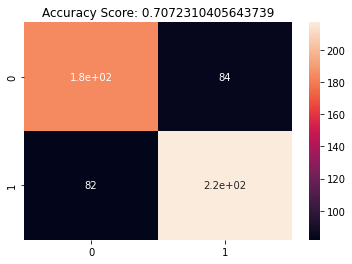

In [38]:
cm_def_model_1 = confusion_matrix(Y_test, Y_pred_def_model_1)
acc_def_model_1 = accuracy_score(Y_test, Y_pred_def_model_1)
sns.heatmap(cm_def_model_1, annot = True)
plt.title('Accuracy Score: {0}'.format(acc_def_model_1))
plt.show()

In [39]:
print(classification_report(Y_test, Y_pred_def_model_1))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       268
           1       0.72      0.73      0.72       299

    accuracy                           0.71       567
   macro avg       0.71      0.71      0.71       567
weighted avg       0.71      0.71      0.71       567



## Random Search

In [40]:
# Define evaluation

cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

In [41]:
# Define search space

space = dict()
space['solver'] = ['newtong-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

In [42]:
# Define search

search = RandomizedSearchCV(lr_1, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

In [43]:
# Execute search

result = search.fit(X_train, Y_train)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10050 fits failed out of a total of 15000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5160 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-pack

In [44]:
# Summarize result

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.674240525556315
Best Hyperparameters: {'C': 26.779972328542662, 'penalty': 'l1', 'solver': 'liblinear'}


In [45]:
lr_def_model_2 = LogisticRegression(C=26.779972328542662,
                                    penalty='l1',
                                    solver='liblinear')

In [46]:
lr_def_model_2.fit(X_train, Y_train)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=26.779972328542662, penalty='l1', solver='liblinear')

In [47]:
Y_pred_def_model_2 = lr_def_model_2.predict(X_test)

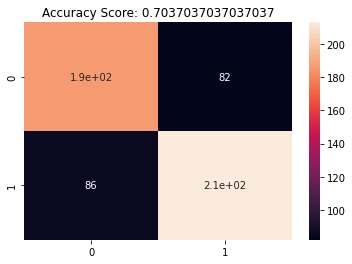

In [48]:
cm_def_model_2 = confusion_matrix(Y_test, Y_pred_def_model_2)
acc_def_model_2 = accuracy_score(Y_test, Y_pred_def_model_2)
sns.heatmap(cm_def_model_2, annot = True)
plt.title('Accuracy Score: {0}'.format(acc_def_model_2))
plt.show()

In [49]:
print(classification_report(Y_test, Y_pred_def_model_2))

              precision    recall  f1-score   support

           0       0.68      0.69      0.69       268
           1       0.72      0.71      0.72       299

    accuracy                           0.70       567
   macro avg       0.70      0.70      0.70       567
weighted avg       0.70      0.70      0.70       567



## Grid Search

In [50]:
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

In [51]:
# define search
search = GridSearchCV(lr_1, space, scoring='accuracy', n_jobs=-1, cv=cv)

In [52]:
# Execute search

result = search.fit(X_train, Y_train)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1440 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-package

In [53]:
# Summarize result

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.6747455760613655
Best Hyperparameters: {'C': 1e-05, 'penalty': 'none', 'solver': 'newton-cg'}


In [54]:
lr_def_model_3 = LogisticRegression(C=1e-05,
                                    penalty='none',
                                    solver='newton-cg')

In [55]:
lr_def_model_3.fit(X_train, Y_train)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1e-05, penalty='none', solver='newton-cg')

In [56]:
Y_pred_def_model_3 = lr_def_model_3.predict(X_test)

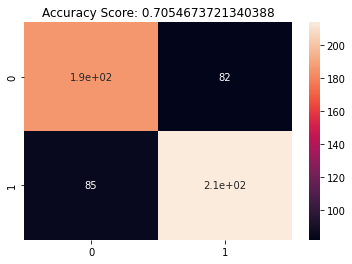

In [57]:
cm_def_model_3 = confusion_matrix(Y_test, Y_pred_def_model_3)
acc_def_model_3 = accuracy_score(Y_test, Y_pred_def_model_3)
sns.heatmap(cm_def_model_3, annot = True)
plt.title('Accuracy Score: {0}'.format(acc_def_model_3))
plt.show()

In [58]:
print(classification_report(Y_test, Y_pred_def_model_3))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       268
           1       0.72      0.72      0.72       299

    accuracy                           0.71       567
   macro avg       0.70      0.70      0.70       567
weighted avg       0.71      0.71      0.71       567



# Crear archivo Pickle

In [59]:
best_model = lr_def_model_1

In [60]:
# Guardar el modelo en un archivo

with open('best_model.pkl', 'wb') as mejor_modelo:
    pickle.dump(best_model, mejor_modelo)

In [61]:
# Cargar el modelo guardado

with open('best_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [62]:
y_pred = model.predict(X_test)

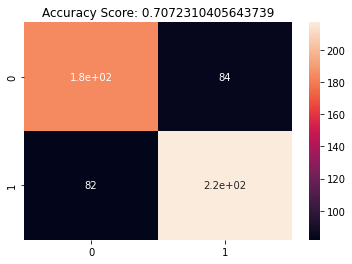

In [63]:
cm_best_model = confusion_matrix(Y_test, y_pred)
acc_best_model = accuracy_score(Y_test, y_pred)
sns.heatmap(cm_best_model, annot = True)
plt.title('Accuracy Score: {0}'.format(acc_best_model))
plt.show()

In [64]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       268
           1       0.72      0.73      0.72       299

    accuracy                           0.71       567
   macro avg       0.71      0.71      0.71       567
weighted avg       0.71      0.71      0.71       567

